# Project 4

## EDA - weather condition and street

In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for loading plot styles into dict
import json

# specify where to save images
IMGDIR = '../images/'

In [2]:
# get font dict
with open('styles.json') as f:
    plot_styles = json.load(f)

In [3]:
df = pd.read_csv('../data/data-eda-wcst-20220915.01.csv')
wc_cols = [c for c in df.columns if c.startswith('wc_')]
st_cols = [c for c in df.columns if c.startswith('st_')]
wcs_cols = wc_cols + ['Severity']
sts_cols = st_cols + ['Severity']
df.head(1)

,wc_clouds,wc_dust,wc_fair,wc_fog,wc_ice,wc_rain,wc_snow,wc_thunder,wc_tornado,wc_wind,st_interstate,st_highway,st_other,Severity
0,0,0,0,0,0,1,0,0,0,0,0,0,1,3


### Weather Conditions

In [4]:
# count of accidents per condition
df[wc_cols].sum()

wc_clouds     1095520
wc_dust          7552
wc_fair       1272769
wc_fog          79493
wc_ice           2079
wc_rain        193915
wc_snow         56457
wc_thunder      31865
wc_tornado          9
wc_wind         41918
dtype: int64

In [5]:
# Tornado does not have enough data and doesn't show much so I'm dropping it here
# after moving its entries into 'wind' category
df.loc[(df['wc_wind'] == 0) & (df['wc_tornado'] == 1), ['wc_wind']] = 1
df.drop(columns=['wc_tornado'], inplace=True)
wc_cols = [c for c in df.columns if c.startswith('wc_')]
wcs_cols = wc_cols + ['Severity']

In [6]:
# count per condition, grouped by severity
wcs_sum = df[wcs_cols].groupby('Severity').sum()
wcs_sum

,wc_clouds,wc_dust,wc_fair,wc_fog,wc_ice,wc_rain,wc_snow,wc_thunder,wc_wind
Severity,,,,,,,,,
1,10355,12,12795,247,3,1810,87,246,549
2,953544,7117,1154904,74430,1576,169845,49513,28657,38199
3,76082,137,52716,2390,222,13151,3102,1952,1761
4,55539,286,52354,2426,278,9109,3755,1010,1418


In [7]:
# make into 2 severity levels (low/high)
wcs_sum = pd.DataFrame([wcs_sum[0:2].sum(), wcs_sum[2:4].sum()])

In [8]:
# normalized count per condition, grouped by severity
wcs_sum_norm = wcs_sum.apply(lambda x: (x / sum(x)) * 100)
wcs_sum_norm

,wc_clouds,wc_dust,wc_fair,wc_fog,wc_ice,wc_rain,wc_snow,wc_thunder,wc_wind
0,87.985523,94.398835,91.744771,93.941605,75.949976,88.520744,87.854473,90.704535,92.417774
1,12.014477,5.601165,8.255229,6.058395,24.050024,11.479256,12.145527,9.295465,7.582226


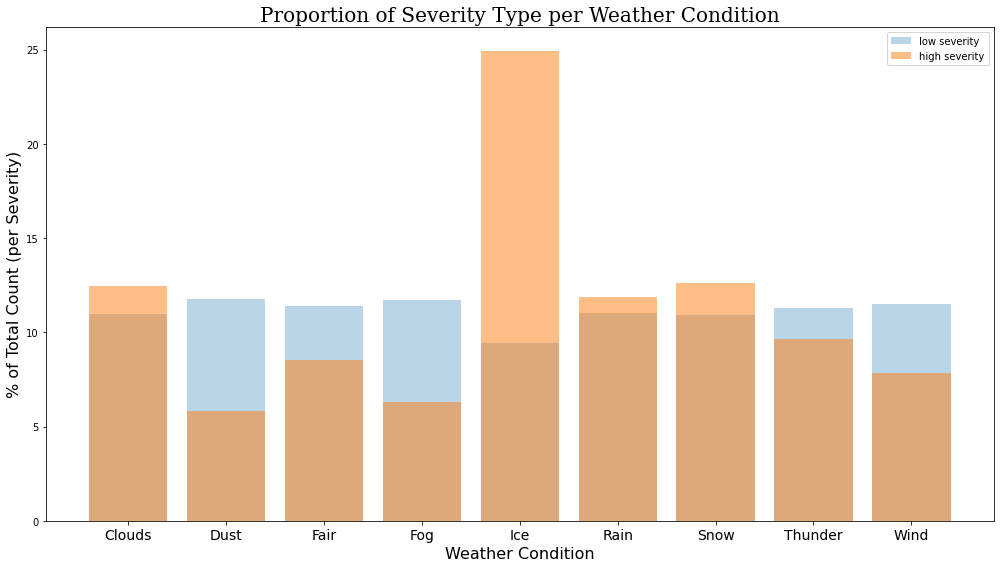

In [9]:
# comparing severity 1/2 with 3/4, per condition, normalized for similar scale
# e.g. wc_clouds sev. 0 divided by all sev. 0
PLT_FNAME = "severity_per_weather_condition.png"
fig, ax = plt.subplots(figsize=(14,8))
ix12 = wcs_sum_norm.loc[0]
ix34 = wcs_sum_norm.loc[1]
ax.bar(wcs_sum_norm.columns, (ix12 / ix12.sum()) * 100, alpha=0.3, label="low severity")
ax.bar(wcs_sum_norm.columns, (ix34 / ix34.sum()) * 100, alpha=0.5, label="high severity")
ax.set_xticks(ax.get_xticks()) # to suppress warning
ax.set_xticklabels([c[3:].title() for c in wcs_sum_norm.columns], fontdict=plot_styles['tick-label'])
ax.set_xlabel('Weather Condition', fontdict=plot_styles['axis-label'])
ax.set_ylabel('% of Total Count (per Severity)', fontdict=plot_styles['axis-label'])
ax.set_title('Proportion of Severity Type per Weather Condition', fontdict=plot_styles['title'])
ax.legend();
plt.tight_layout()
plt.savefig(IMGDIR + PLT_FNAME, transparent=False)

This graph shows severity counts for each weather condition, normalized. The values are calculated by dividing the severity count per condition by the total number of that severity (so e.g. 10 high severity clouds divided by total high severity accidents). Low severity accidents are about even across the board, but there is a large bump in high-severity accidents in icy conditions, and rain, snow, and clouds show a small increase.

### Street Type

In [10]:
df[st_cols].sum()

st_interstate     752571
st_highway        663007
st_other         1315472
dtype: int64

In [11]:
sts_sum = df[sts_cols].groupby('Severity').sum()
sts_sum

,st_interstate,st_highway,st_other
Severity,,,
1,4475,3737,17287
2,661119,585076,1186428
3,58717,40158,49902
4,28260,34036,61855


In [12]:
# make into 2 severity levels
sts_sum = pd.DataFrame([sts_sum[0:2].sum(), sts_sum[2:4].sum()])

In [13]:
sts_sum_norm = sts_sum.apply(lambda x: (x / sum(x)) * 100)
sts_sum_norm

,st_interstate,st_highway,st_other
0,88.442685,88.80947,91.504418
1,11.557315,11.19053,8.495582


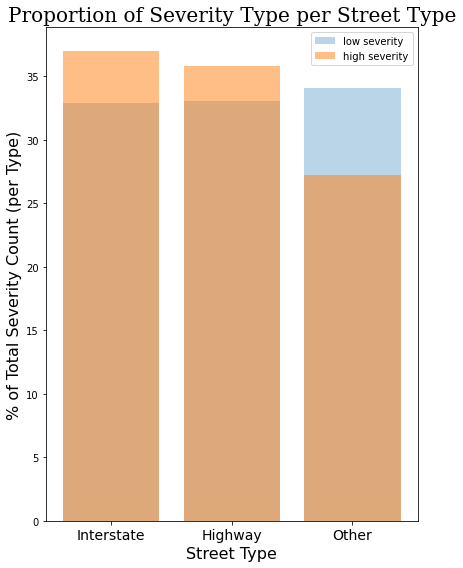

In [14]:
# comparing severity 1/2 with 3/4, per street type, normalized for similar scale
PLT_FNAME = "severity_per_street_type.png"
fig, ax = plt.subplots(figsize=(6,8))
ix12 = sts_sum_norm.loc[0]
ix34 = sts_sum_norm.loc[1]
ax.bar(sts_sum_norm.columns, (ix12 / ix12.sum()) * 100, alpha=0.3, label="low severity")
ax.bar(sts_sum_norm.columns, (ix34 / ix34.sum()) * 100, alpha=0.5, label="high severity")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([c[3:].title() for c in sts_sum_norm.columns], fontdict=plot_styles['tick-label'])
ax.set_xlabel('Street Type', fontdict=plot_styles['axis-label'])
ax.set_ylabel('% of Total Severity Count (per Type)', fontdict=plot_styles['axis-label'])
ax.set_title('Proportion of Severity Type per Street Type', fontdict=plot_styles['title'])
ax.legend();
plt.tight_layout()
plt.savefig(IMGDIR + PLT_FNAME, transparent=False)

### Export Cleaned Table

EDA on weather conditions and street types showed that only the tornado weather type was not really usable here. Save the corrected data.

In [15]:
df.to_csv('../data/data-eda-wcst-20220916.01.csv', index=False)

### Full DF Review

In [16]:
# adjust to 2 severity levels
df['Severity'] = [0 if s <= 2 else 1 for s in df['Severity']]
df['Severity'].value_counts()

0    2458122
1     272928
Name: Severity, dtype: int64

In [44]:
# baseline
df['Severity'].value_counts(normalize=True)

0    0.900065
1    0.099935
Name: Severity, dtype: float64